In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Google Drive Set Up

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Instal Auto ML

Import summary file

In [ ]:
import pandas as pd
sum=pd.read_csv('/content/gdrive/MyDrive/Hackathon/Cyclon-historic-1950-2015.csv')

#Transform summary file

Present the sample of Cyclon-historic data

In [ ]:
sum

,year,IBTrACS_ID,TC_name,NatCatSERVICE_ID,genesis_basin,countries_affected,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets
0,1950,1950166N14262,UNNAMED,NaN,EP,single,MEX,47.3,92.0,1.435042e+06,7.167764e+09,144515.0,5.596732e+08,0.0,0.000000e+00
1,1950,1950174N17126,ELSIE,NaN,WP,multi,JPN,51.7,100.6,8.460128e+06,7.167389e+10,777936.0,7.370407e+09,19705.0,2.335967e+08
2,1950,1950174N17126,ELSIE,NaN,WP,multi,KOR,19.5,37.8,4.054690e+05,8.689325e+08,0.0,0.000000e+00,0.0,0.000000e+00
3,1950,1950185N18254,UNNAMED,NaN,EP,single,MEX,28.8,55.9,1.943860e+05,9.145901e+08,0.0,0.000000e+00,0.0,0.000000e+00
4,1950,1950191N12149,UNNAMED,NaN,WP,single,JPN,26.0,50.5,1.495240e+05,1.962303e+09,0.0,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,2015,2015344N07145,MELOR,NaN,WP,multi,PHL,65.9,128.1,5.133590e+07,4.594407e+11,18618400.0,1.808132e+11,4607241.0,4.602029e+10
5336,3015,3015355S16136,UNNAMED,XX,PS,singles,AUStrialia,0.7,0.1,0.000000e+00,7.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
5337,1015,1015355S1015T,TornadorCyclop,NaN,NaN,single,NATEU,22.7,44.1,-1.000000e+11,1.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
5338,2015,2015355S0987654321,NAME,NaN,SP,single,AX,22.7,44.1,1.000000e+10,-7.205000e+01,0.0,0.000000e+00,0.0,0.000000e+00


Year column tranformation

In [ ]:
sum = sum[sum.year>=2000]

from datetime import date

current_year = date.today().year

sum = sum[sum.year<=current_year]
sum.year.value_counts()

2005    115
2008    104
2010     98
2004     92
2013     87
2006     86
2003     85
2012     85
2000     84
2007     84
2011     82
2001     78
2015     72
2009     69
2014     67
2002     56
Name: year, dtype: int64

Unique values in 

In [ ]:
sum.ISO3.unique()

array(['FJI', 'VUT', 'AUS', 'REU', 'MDG', 'MOZ', 'MUS', 'ZWE', 'TON',
       'PHL', 'JPN', 'CHN', 'TWN', 'ISL', 'MEX', 'LAO', 'VNM', 'AIA',
       'ANT', 'ATG', 'DOM', 'GLP', 'KNA', 'MSR', 'PRI', 'VIR', 'IND',
       'HKG', 'KOR', 'USA', 'GBR', 'IRL', 'BLZ', 'GTM', 'HND', 'CAN',
       'SPM', 'BGD', 'LKA', 'NCL', 'ZAF', 'NIC', 'HTI', 'JAM', 'LCA',
       'MTQ', 'BHS', 'CUB', 'KHM', 'IDN', 'MYS', 'SGP', 'OMN', 'YEM',
       'MMR', 'BRB', 'VCT', 'RUS', 'COM', 'SLB', 'PNG', 'FRO', 'WSM',
       'BRA', 'THA', 'TCA', 'ABW', 'COL', 'GRD', 'TTO', 'VEN', 'NOR',
       'MYT', 'ASM', 'SLV', 'DZA', 'ESP', 'MAR', 'IRN', 'PAK', 'DMA',
       'CRI', 'SOM', 'CPV', 'PRK', 'PRT', 'TLS', 'AX'], dtype=object)

Drop columns

In [ ]:
sum = sum.drop(columns=['NatCatSERVICE_ID', 'TC_name','genesis_basin','countries_affected'])

sum = sum[sum.IBTrACS_ID != "2015355S0987654321"]
sum

,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets
3994,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.000000e+00,0.0,0.000000e+00
3995,2000,2000006S15164,VUT,47.6,92.5,142253.0,3.483611e+08,50366.0,1.337327e+08,0.0,0.000000e+00
3996,2000,2000019S11127,AUS,19.5,37.8,26.0,1.051542e+07,0.0,0.000000e+00,0.0,0.000000e+00
3997,2000,2000025S15056,REU,29.6,57.4,722844.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
3998,2000,2000032S11115,MDG,50.1,97.5,6769841.0,2.039853e+09,4024843.0,1.039041e+09,16271.0,5.591145e+06
...,...,...,...,...,...,...,...,...,...,...,...
5332,2015,2015309N14067,SOM,39.0,75.8,226629.0,6.596252e+06,40110.0,1.131492e+06,0.0,0.000000e+00
5333,2015,2015309N14067,YEM,61.6,119.7,59993.0,1.188943e+08,57685.0,1.099661e+08,49016.0,9.060994e+07
5334,2015,2015312N11083,IND,19.4,37.8,846968.0,4.957173e+09,0.0,0.000000e+00,0.0,0.000000e+00
5335,2015,2015344N07145,PHL,65.9,128.1,51335904.0,4.594407e+11,18618400.0,1.808132e+11,4607241.0,4.602029e+10


Plot dataframe and colmns informations

In [ ]:
sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 3994 to 5339
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1343 non-null   int64  
 1   IBTrACS_ID   1343 non-null   object 
 2   ISO3         1343 non-null   object 
 3   v_land_SI    1343 non-null   float64
 4   v_land_kn    1343 non-null   float64
 5   34kn_pop     1343 non-null   float64
 6   34kn_assets  1343 non-null   float64
 7   64kn_pop     1343 non-null   float64
 8   64kn_assets  1343 non-null   float64
 9   96kn_pop     1343 non-null   float64
 10  96kn_assets  1343 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 125.9+ KB


Describe all columns in dataframe

In [ ]:
sum.describe(include ='all')

,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets
count,1343.000000,1343,1343,1343.000000,1343.000000,1.343000e+03,1.343000e+03,1.343000e+03,1.343000e+03,1.343000e+03,1.343000e+03
unique,NaN,727,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011233N15301,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.431869,NaN,NaN,35.286746,68.593075,8.008782e+06,3.409446e+11,1.479194e+06,8.297613e+10,1.986226e+05,8.729639e+09
std,4.440828,NaN,NaN,14.028665,27.267438,1.559391e+07,1.015864e+12,4.689940e+06,3.629275e+11,1.353032e+06,6.367669e+10
min,2000.000000,NaN,NaN,17.500000,34.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2004.000000,NaN,NaN,24.150000,46.900000,7.791800e+04,7.718288e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,NaN,NaN,31.200000,60.700000,1.120265e+06,1.161394e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2011.000000,NaN,NaN,43.850000,85.250000,7.886183e+06,1.183047e+11,2.512890e+05,4.483596e+09,0.000000e+00,0.000000e+00


Droping duplicates from dataframe

In [ ]:
sum.drop_duplicates()

,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets
3994,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.000000e+00,0.0,0.000000e+00
3995,2000,2000006S15164,VUT,47.6,92.5,142253.0,3.483611e+08,50366.0,1.337327e+08,0.0,0.000000e+00
3996,2000,2000019S11127,AUS,19.5,37.8,26.0,1.051542e+07,0.0,0.000000e+00,0.0,0.000000e+00
3997,2000,2000025S15056,REU,29.6,57.4,722844.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
3998,2000,2000032S11115,MDG,50.1,97.5,6769841.0,2.039853e+09,4024843.0,1.039041e+09,16271.0,5.591145e+06
...,...,...,...,...,...,...,...,...,...,...,...
5332,2015,2015309N14067,SOM,39.0,75.8,226629.0,6.596252e+06,40110.0,1.131492e+06,0.0,0.000000e+00
5333,2015,2015309N14067,YEM,61.6,119.7,59993.0,1.188943e+08,57685.0,1.099661e+08,49016.0,9.060994e+07
5334,2015,2015312N11083,IND,19.4,37.8,846968.0,4.957173e+09,0.0,0.000000e+00,0.0,0.000000e+00
5335,2015,2015344N07145,PHL,65.9,128.1,51335904.0,4.594407e+11,18618400.0,1.808132e+11,4607241.0,4.602029e+10


# ISO file

Load ISO file

In [ ]:
iso  = pd.read_excel("/content/gdrive/MyDrive/Hackathon/ISO_to_Name.xlsx")
iso = iso[['Alpha-3 code',"Country"]]
iso = iso.rename(columns={"Alpha-3 code": "ISO3"})
iso

,ISO3,Country
0,AFG,Afghanistan
1,ALA,Åland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa
...,...,...
244,WLF,Wallis and Futuna
245,ESH,Western Sahara
246,YEM,Yemen
247,ZMB,Zambia


# Merging appending all cyclone logs into one excel file

In [ ]:
xs = list(range(2000,current_year,1))
s = " ".join(str(x) for x in xs)
comp = pd.DataFrame()

# import required module
import os
# assign directory
directory = '/content/gdrive/MyDrive/Hackathon/data'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if f.split('/')[-1][0:4].strip() in s:
            #For each file
             print(f.split('/')[-1].replace("_hist.csv",""))
             id =f.split('/')[-1].replace("_hist.csv","")
             test = pd.read_csv(f)
             test['IBTrACS_ID'] = id
             test.insert(0,'IBTrACS_ID',test.pop('IBTrACS_ID'))

             comp = comp.append(test)

2005255N14113
2013362S09053
2003188N11307
2005282N22138
2005301N13117
2005249N26281
2000266N12337
2013167N12128
2003156S07155
2008062S10064
2012263N15141
2013241N19254
2000083S17102
2003302N11133
2009189N17129
2006364S12058
2010257N16282
2011240N10341
2000025S15056
2005275N19274
2012359N08134
2009171N15264
2003249N14329
2007133N15091
2012162N06150
2008058S15131
2007188N04148
2010143S20035
2005026S20040
2001204N19127
2015191N23085
2009268N14128
2014190N08154
2010358S13152
2008272N08139
2013229N26132
2010363S15133
2010243N12146
2005289N18282
2001248N23125
2002240N16155
2013251N13342
2009239N12270
2005255N20087
2015012N09146
2009272N07164
2002364S16045
2005261N21290
2000232N12116
2014004S17183
2001246N19156
2001320S11146
2000299N08139
2009271N15257
2004231N09147
2010032S20042
2004156N16117
2011266N13139
2005279N17111
2004164N06139
2004255N11267
2004288N09164
2012296N14283
2013046S20042
2000290N30289
2011253N20145
2000245N14157
2013339N09084
2012346S14180
2000032S11115
2012037S17176
201325

Creating one additional column to chceck ID

In [ ]:
comp['ID_test'] = comp["IBTrACS_ID"]

comp

,IBTrACS_ID,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed,ID_test
0,2005255N14113,VNM,13.4,109.1,6.832450e+07,11398.017578,34.180465,2005255N14113
1,2005255N14113,VNM,13.4,109.2,1.080400e+08,22129.664062,34.949948,2005255N14113
2,2005255N14113,VNM,13.4,109.3,4.436525e+07,6143.662109,34.827971,2005255N14113
3,2005255N14113,VNM,13.4,109.4,0.000000e+00,0.000000,34.625358,2005255N14113
4,2005255N14113,VNM,13.5,109.1,4.524026e+07,6082.568359,35.104081,2005255N14113
...,...,...,...,...,...,...,...,...
444,2004283N24265,USA,34.0,-91.1,2.129800e+07,12.719895,36.785491,2004283N24265
445,2004283N24265,USA,34.1,-91.4,1.298790e+08,409.109802,36.253410,2004283N24265
446,2004283N24265,USA,34.1,-91.3,8.608929e+07,189.527786,36.066041,2004283N24265
447,2004283N24265,USA,34.1,-91.2,3.396898e+07,38.334518,35.417622,2004283N24265


Merging cyclons summary with logs of cyclone

In [ ]:
res = pd.merge(sum,comp,how = 'left',left_on=["IBTrACS_ID","ISO3"],right_on=["IBTrACS_ID","ISO"])
res

,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed,ID_test
0,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.3,178.1,0.000000e+00,0.000000,47.773890,2000006S15164
1,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.3,178.2,0.000000e+00,0.000000,47.333954,2000006S15164
2,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.2,177.9,0.000000e+00,0.000000,51.807256,2000006S15164
3,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.2,178.1,0.000000e+00,0.000000,50.167214,2000006S15164
4,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.2,178.2,0.000000e+00,0.000000,48.784714,2000006S15164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550903,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,130.8,3.058652e+06,1.408258,34.564601,2015355S16136
550904,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,130.9,2.042189e+06,0.921374,35.005035,2015355S16136
550905,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,131.0,0.000000e+00,0.000000,35.148239,2015355S16136
550906,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,131.1,2.008963e+06,0.956313,34.968299,2015355S16136


Chcecking if there are rows with different id

In [ ]:
res['the_same_id'] = res['IBTrACS_ID']==res['ID_test']

res[res['the_same_id']==False]


,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed,ID_test,the_same_id


Checking if there are rows with different ISO values

In [ ]:
res['ISO_test'] = res['ISO3']==res['ISO']

res[res['ISO_test']==False]


,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed,ID_test,the_same_id,ISO_test


Ploting the result of joining summary data with cyclone logs

In [ ]:
res

,year,IBTrACS_ID,ISO3,v_land_SI,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed,ID_test,the_same_id,ISO_test
0,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.3,178.1,0.000000e+00,0.000000,47.773890,2000006S15164,True,True
1,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.3,178.2,0.000000e+00,0.000000,47.333954,2000006S15164,True,True
2,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.2,177.9,0.000000e+00,0.000000,51.807256,2000006S15164,True,True
3,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.2,178.1,0.000000e+00,0.000000,50.167214,2000006S15164,True,True
4,2000,2000006S15164,FJI,28.2,54.7,116986.0,6.023230e+08,0.0,0.0,0.0,0.0,FJI,-19.2,178.2,0.000000e+00,0.000000,48.784714,2000006S15164,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550903,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,130.8,3.058652e+06,1.408258,34.564601,2015355S16136,True,True
550904,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,130.9,2.042189e+06,0.921374,35.005035,2015355S16136,True,True
550905,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,131.0,0.000000e+00,0.000000,35.148239,2015355S16136,True,True
550906,2015,2015355S16136,AUS,22.7,44.1,101503.0,7.203549e+09,0.0,0.0,0.0,0.0,AUS,-11.8,131.1,2.008963e+06,0.956313,34.968299,2015355S16136,True,True


In [ ]:
# Saving result of join to excel to computer disk
#res.to_excel("result_dataset_1.xlsx")

In [ ]:
# Saving result of join to excel to cloud disk
#res.to_excel('/content/gdrive/MyDrive/Hackathon/result_dataset_1.xlsx')

#Preparing data for ML

In [ ]:
ml_df  = res[["IBTrACS_ID","ISO","LAT","LON","exposed_assets","exposed_pop","windspeed"]]
#ml_df  = res[["LAT","LON","exposed_assets","exposed_pop","windspeed"]]
ml_df

,IBTrACS_ID,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed
0,2000006S15164,FJI,-19.3,178.1,0.000000e+00,0.000000,47.773890
1,2000006S15164,FJI,-19.3,178.2,0.000000e+00,0.000000,47.333954
2,2000006S15164,FJI,-19.2,177.9,0.000000e+00,0.000000,51.807256
3,2000006S15164,FJI,-19.2,178.1,0.000000e+00,0.000000,50.167214
4,2000006S15164,FJI,-19.2,178.2,0.000000e+00,0.000000,48.784714
...,...,...,...,...,...,...,...
550903,2015355S16136,AUS,-11.8,130.8,3.058652e+06,1.408258,34.564601
550904,2015355S16136,AUS,-11.8,130.9,2.042189e+06,0.921374,35.005035
550905,2015355S16136,AUS,-11.8,131.0,0.000000e+00,0.000000,35.148239
550906,2015355S16136,AUS,-11.8,131.1,2.008963e+06,0.956313,34.968299


Saving data to ML to Excel

In [ ]:
res[["LAT","LON","exposed_pop","windspeed","exposed_assets"]].to_excel("/content/gdrive/MyDrive/Hackathon/ml_data.xlsx")

# Machine Learning

Importing modules

In [ ]:
import pycaret
from pycaret.regression import *
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.3.10


Setup of ML model

In [ ]:
grid = setup(data=res[["LAT","LON","exposed_pop","windspeed","exposed_assets"]], target='exposed_assets')
grid

,Description,Value
0,session_id,1930
1,Target,exposed_assets
2,Original Data,"(550908, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(385635, 4)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='exposed_assets',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

(         LAT    LON  exposed_pop  windspeed  exposed_assets
 0      -19.3  178.1     0.000000  47.773890    0.000000e+00
 1      -19.3  178.2     0.000000  47.333954    0.000000e+00
 2      -19.2  177.9     0.000000  51.807256    0.000000e+00
 3      -19.2  178.1     0.000000  50.167214    0.000000e+00
 4      -19.2  178.2     0.000000  48.784714    0.000000e+00
 ...      ...    ...          ...        ...             ...
 550903 -11.8  130.8     1.408258  34.564601    3.058652e+06
 550904 -11.8  130.9     0.921374  35.005035    2.042189e+06
 550905 -11.8  131.0     0.000000  35.148239    0.000000e+00
 550906 -11.8  131.1     0.956313  34.968299    2.008963e+06
 550907 -11.8  131.2     0.217231  34.773862    4.975612e+05
 
 [550908 rows x 5 columns],
 False,
 [],
 'da20',
 False,
 5,
 None,
 10,
 'reg-default-name',
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=Tru

Creating Decision Tree Regressor

In [ ]:
best = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.237128e+07,9.607671e+16,3.099624e+08,0.9947,0.9277,1.0777
1,6.196534e+07,1.251123e+18,1.118536e+09,0.9459,0.9364,0.9365
2,5.612863e+07,1.992303e+17,4.463523e+08,0.9894,0.9551,0.4865
3,6.419333e+07,4.827903e+17,6.948312e+08,0.9810,0.8892,3.5618
4,5.321453e+07,2.194354e+17,4.684394e+08,0.9889,0.8922,0.7040
5,5.248863e+07,1.020899e+17,3.195150e+08,0.9937,0.8833,0.5357
6,5.929537e+07,2.340089e+17,4.837447e+08,0.9880,0.9820,0.6373
7,5.503325e+07,2.230551e+17,4.722871e+08,0.9856,0.9523,1.2501
8,5.767666e+07,4.307099e+17,6.562849e+08,0.9812,0.9461,0.7923


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best')
INFO:logs:create_model() succesfully completed......................................


Printing setup data of Decision Tree Regressor 

In [ ]:
print(best)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best')


# Model Evaluation and summaryzation

In [ ]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Error Ploting

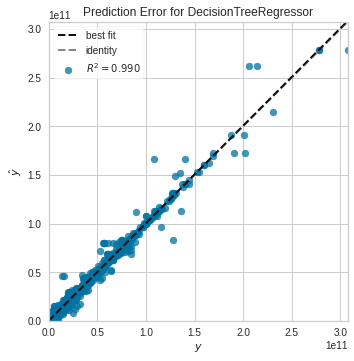

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'error')

Ploting residuals

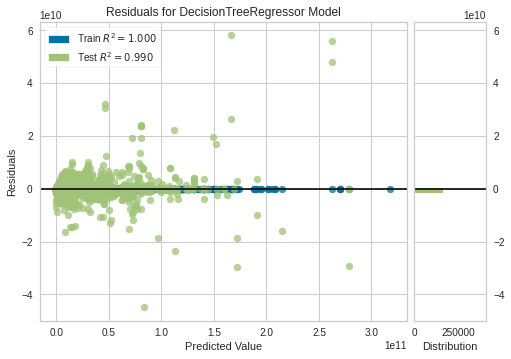

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'residuals')

Ploting importance features

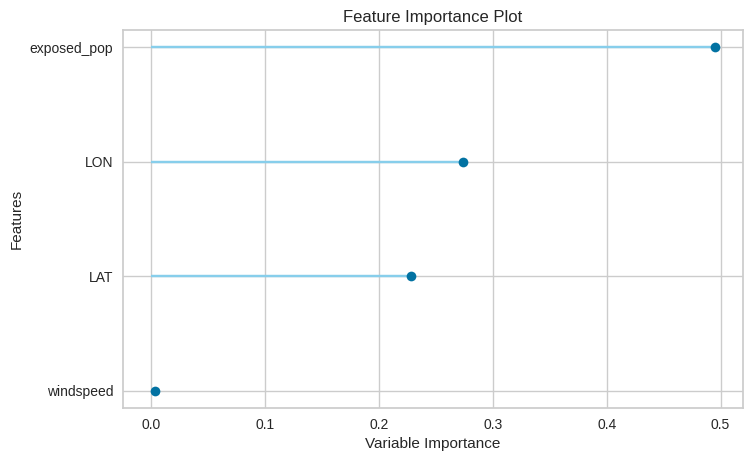

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'feature')

# Predicting result

Predicting model

In [ ]:
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,5.314517e+07,2.108765e+17,4.592130e+08,0.9901,0.8808,1.0165


,LAT,LON,exposed_pop,windspeed,exposed_assets,Label
0,34.900002,-76.000000,0.000000,99.768288,0.000000e+00,0.000000e+00
1,22.799999,-102.300003,5164.826660,39.637001,1.182992e+08,9.775839e+07
2,22.100000,83.699997,6574.177246,47.524578,3.398226e+07,2.887417e+07
3,21.100000,-76.199997,9767.197266,35.070599,8.919662e+07,7.377395e+07
4,26.900000,119.199997,2530.824707,43.705139,7.612827e+07,5.466558e+07
...,...,...,...,...,...,...
165268,30.200001,121.300003,282623.281250,44.005066,1.737049e+09,4.858933e+09
165269,25.700001,-80.400002,187745.156250,35.506680,2.786846e+10,2.741785e+10
165270,11.200000,78.199997,79635.023438,61.415447,1.588159e+08,1.531772e+08
165271,-9.700000,119.400002,22416.042969,34.599655,5.999516e+07,5.816634e+07


Print data of the model

In [ ]:
print(best)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best')


Read data to predict

In [ ]:
x_pred = pd.read_csv('/content/gdrive/MyDrive/Hackathon/Submission.csv')
x_pred

,IBTrACS_ID,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed
0,2007362S13131,AUS,-15.0,129.1,NaN,0.277678,36.537072
1,2007362S13131,AUS,-13.6,132.3,NaN,11.318868,39.854170
2,2007362S13131,AUS,-13.2,133.0,NaN,0.000000,41.614056
3,2007362S13131,AUS,-13.4,133.2,NaN,0.000000,36.810300
4,2007362S13131,AUS,-12.5,131.9,NaN,2.651106,49.572700
...,...,...,...,...,...,...,...
60855,2013293N13260,MEX,17.9,-102.1,NaN,4613.271973,43.335614
60856,2013293N13260,MEX,18.2,-102.1,NaN,178.753204,37.998141
60857,2013293N13260,MEX,18.0,-102.5,NaN,599.890686,39.914836
60858,2013293N13260,MEX,17.9,-102.6,NaN,0.000000,40.949982


Make prediction and saving prediction into Excel and CSV

In [ ]:
predictions = predict_model(best, data=x_pred)
predictions['exposed_assets'] = predictions.Label
predictions = predictions.drop(['Label'], axis=1)
predictions.to_excel("/content/gdrive/MyDrive/Hackathon/final_result.xlsx")
predictions.to_csv("/content/gdrive/MyDrive/Hackathon/result/Submission.csv")
predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0,0,0,0,0,0


,IBTrACS_ID,ISO,LAT,LON,exposed_assets,exposed_pop,windspeed
0,2007362S13131,AUS,-15.0,129.1,1.217815e+05,0.277678,36.537072
1,2007362S13131,AUS,-13.6,132.3,3.431916e+06,11.318868,39.854170
2,2007362S13131,AUS,-13.2,133.0,0.000000e+00,0.000000,41.614056
3,2007362S13131,AUS,-13.4,133.2,0.000000e+00,0.000000,36.810300
4,2007362S13131,AUS,-12.5,131.9,2.667878e+06,2.651106,49.572700
...,...,...,...,...,...,...,...
60855,2013293N13260,MEX,17.9,-102.1,4.455866e+07,4613.271973,43.335614
60856,2013293N13260,MEX,18.2,-102.1,1.276296e+07,178.753204,37.998141
60857,2013293N13260,MEX,18.0,-102.5,1.797919e+07,599.890686,39.914836
60858,2013293N13260,MEX,17.9,-102.6,0.000000e+00,0.000000,40.949982


Ploting Model results

In [ ]:
plot_model(best, plot = 'tree')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(fold=None, use_train_data=False, verbose=True, is_in_evaluate=False, display=None, display_format=None, estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1930, splitter='best'), feature_name=None, fit_kwargs=None, groups=None, label=False, plot=tree, plot_kwargs=None, save=False, scale=1, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=5)

INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Copying test dataset
INFO:logs:Plot type: tree
INFO:logs:Plotting decision trees
INFO:logs:Plotting tree 0


In [ ]:
plot_model(best, plot = 'manifold')

In [ ]:
plot_model(best, plot = 'vc')

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
plot_model(best, plot = 'feature_all')

In [ ]:
plot_model(best, plot = 'feature_all')